# **Equipo 2**
## **Proyecto: Cancer de mama en México**

#### Integrantes:
- Zoé Ariel García Martínez
- Atenea De La Cruz Brito
- Juan Luis Carrillo de la Cruz

## **Pregunta de investigación 1**

#### **¿Cómo ha sido el crecimiento en la incidencia del cáncer de mama en México?**

### Analizo las bd que obtuve del SICAM.
### Comenzaré con el dataset (DS) correspondiente a los datos del 2013.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn  as sns
import folium
import geopandas as gpd
sns.set(style='whitegrid')

In [2]:
d_sicam13 = pd.read_csv("../Equipo_2_P2_Analisis/DATA/SICAM_DATA/Mastografias 2013.csv", encoding = 'latin-1', header = 1)
d_sicam13.head()

,Clave Entidad,Entidad,Clave Jurisdicción,Jurisdicción,Clave Municipio,Municipio,Edad,Fecha Toma Masto,Fecha Interpretación Masto,Resultado
0,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,52,2013-02-18 00:00:00.000,2013-02-18 00:00:00.000,Probablemente Benigna
1,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
2,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
3,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,69,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
4,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,44,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa


### reviso los types en mi DS: 

In [3]:
d_sicam13.dtypes

Clave Entidad                  int64
Entidad                       object
Clave Jurisdicción             int64
Jurisdicción                  object
Clave Municipio                int64
Municipio                     object
Edad                           int64
Fecha Toma Masto              object
Fecha Interpretación Masto    object
Resultado                     object
dtype: object

### reviso la info en mi DS

In [4]:
d_sicam13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790064 entries, 0 to 790063
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Clave Entidad               790064 non-null  int64 
 1   Entidad                     790064 non-null  object
 2   Clave Jurisdicción          790064 non-null  int64 
 3   Jurisdicción                790064 non-null  object
 4   Clave Municipio             790064 non-null  int64 
 5   Municipio                   790064 non-null  object
 6   Edad                        790064 non-null  int64 
 7   Fecha Toma Masto            790064 non-null  object
 8   Fecha Interpretación Masto  790064 non-null  object
 9   Resultado                   790051 non-null  object
dtypes: int64(4), object(6)
memory usage: 60.3+ MB


In [5]:
# Se eliminan algunas columnas no necesarias 
columnas  = ['Clave Entidad', 'Clave Jurisdicción', 'Jurisdicción', 'Clave Municipio', 'Municipio']

d_sicam13 = d_sicam13.drop(columns = columnas)
d_sicam13.head()

,Entidad,Edad,Fecha Toma Masto,Fecha Interpretación Masto,Resultado
0,Aguascalientes,52,2013-02-18 00:00:00.000,2013-02-18 00:00:00.000,Probablemente Benigna
1,Aguascalientes,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
2,Aguascalientes,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
3,Aguascalientes,69,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
4,Aguascalientes,44,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa


### algo que me gustaría hacer a mi DS es renombrar algunas columnas como ```Fecha Toma Masto``` y ```Fecha Interpretación Masto```, entonces procedo haciendo un remapeo con un diccionario y usando el método ```.rename()```:

In [6]:
c_rename = {
    'Fecha Interpretación Masto': 'fecha_interpretacion_masto',
    'Fecha Toma Masto': 'fecha_toma_masto',
    'Edad': 'edad',
    'Entidad': 'estado',
    'Resultado': 'resultado'
}

d_sicam13 = d_sicam13.rename(columns = c_rename)

d_sicam13.head()

,estado,edad,fecha_toma_masto,fecha_interpretacion_masto,resultado
0,Aguascalientes,52,2013-02-18 00:00:00.000,2013-02-18 00:00:00.000,Probablemente Benigna
1,Aguascalientes,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
2,Aguascalientes,48,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
3,Aguascalientes,69,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa
4,Aguascalientes,44,2013-02-05 00:00:00.000,2013-02-05 00:00:00.000,Negativa


In [7]:
#ahora checo los tipos de datos disponibles: 

d_sicam13.dtypes

estado                        object
edad                           int64
fecha_toma_masto              object
fecha_interpretacion_masto    object
resultado                     object
dtype: object

In [8]:
#ahora dropeo posibles NAN: 

d_sicam13 = d_sicam13.dropna()

In [9]:
#casteo los nuevos tipos de datos: 
dicc_conversion = {
    'estado': 'str',
    'fecha_toma_masto': 'datetime64[ms]',
    'fecha_interpretacion_masto': 'datetime64[ms]',
    'resultado': 'str'
}

d_sicam13 = d_sicam13.astype(dicc_conversion)

In [10]:
d_sicam13.head()

,estado,edad,fecha_toma_masto,fecha_interpretacion_masto,resultado
0,Aguascalientes,52,2013-02-18,2013-02-18,Probablemente Benigna
1,Aguascalientes,48,2013-02-05,2013-02-05,Negativa
2,Aguascalientes,48,2013-02-05,2013-02-05,Negativa
3,Aguascalientes,69,2013-02-05,2013-02-05,Negativa
4,Aguascalientes,44,2013-02-05,2013-02-05,Negativa


In [11]:
#ahora agrupo por resultado de mastografía y estado:
d_sicam13_agrupada = d_sicam13.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam13_agrupada = d_sicam13_agrupada.rename(columns = {'estado': 'count'}).reset_index()
d_sicam13_agrupada.head()

,resultado,estado,count
0,Altamente Sugestiva a Malignidad,Aguascalientes,31
1,Altamente Sugestiva a Malignidad,Baja California,31
2,Altamente Sugestiva a Malignidad,Baja California Sur,2
3,Altamente Sugestiva a Malignidad,Campeche,25
4,Altamente Sugestiva a Malignidad,Chiapas,1


Ya que la simple tabla no nos dice mucho al respecto, usaremos graficos de barras para poder observar que estados de la Republica Mexicana presentan una alta sugestiva a malignidad.

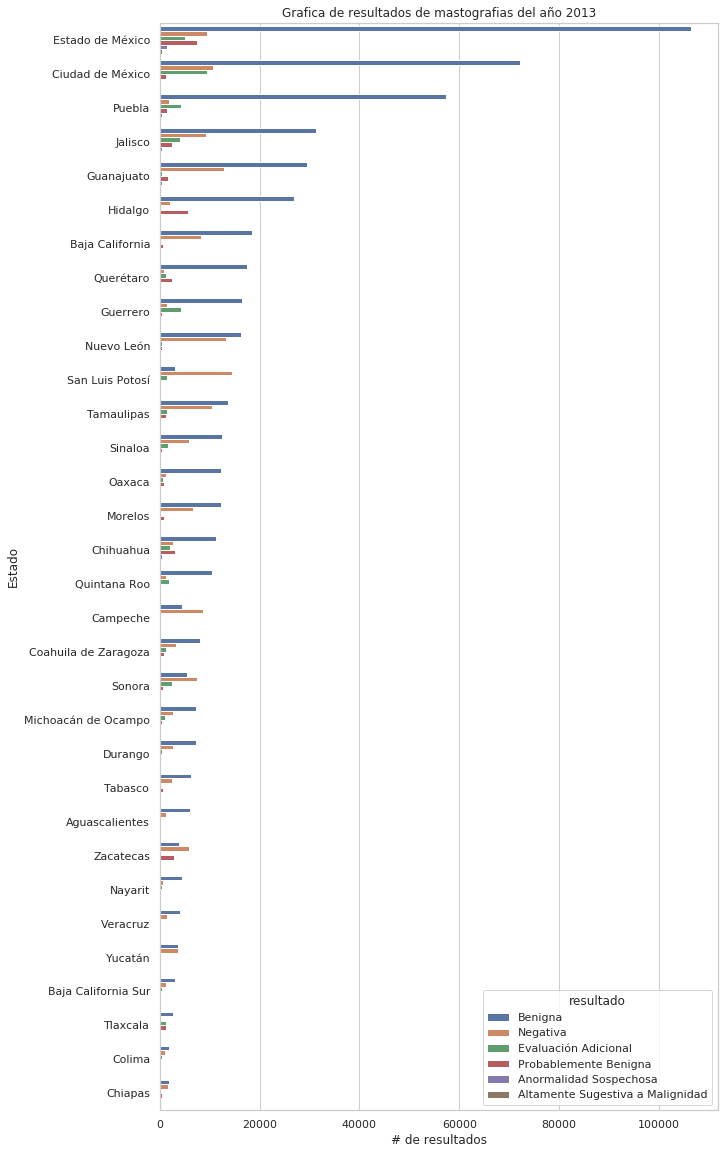

In [12]:
d_sicam13_agrupada = d_sicam13_agrupada.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam13_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2013')
ax.set(xlabel='# de resultados', ylabel='Estado');

Como podemos observar la mayoria de los resultados arrojan un resultado negativo o con un tumor benigno, pero veamos como se comportan los datos sin esos resultados  

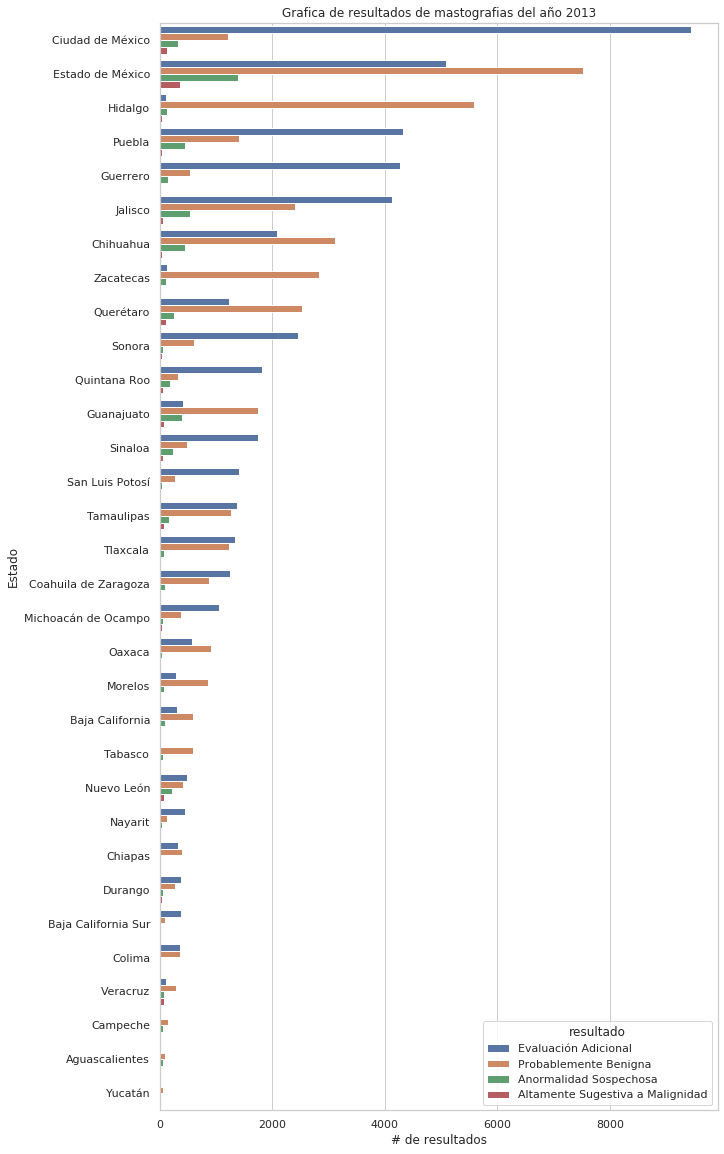

In [13]:
d_sicam13_agrupada = d_sicam13_agrupada[(d_sicam13_agrupada['resultado'] != 'Benigna') & (d_sicam13_agrupada['resultado'] != 'Negativa')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam13_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2013')
ax.set(xlabel='# de resultados', ylabel='Estado');

Los datos de nuevo nos presentan una baja incidencia de casos con respecto a la evaluacion adicional y la probabilidad de un tumor benigno, entonces, reduciremos nuestros datos unicamente a aquellos que se presentan como tumores con alta sugestiva a malignidad o anormalidades sospechosas.

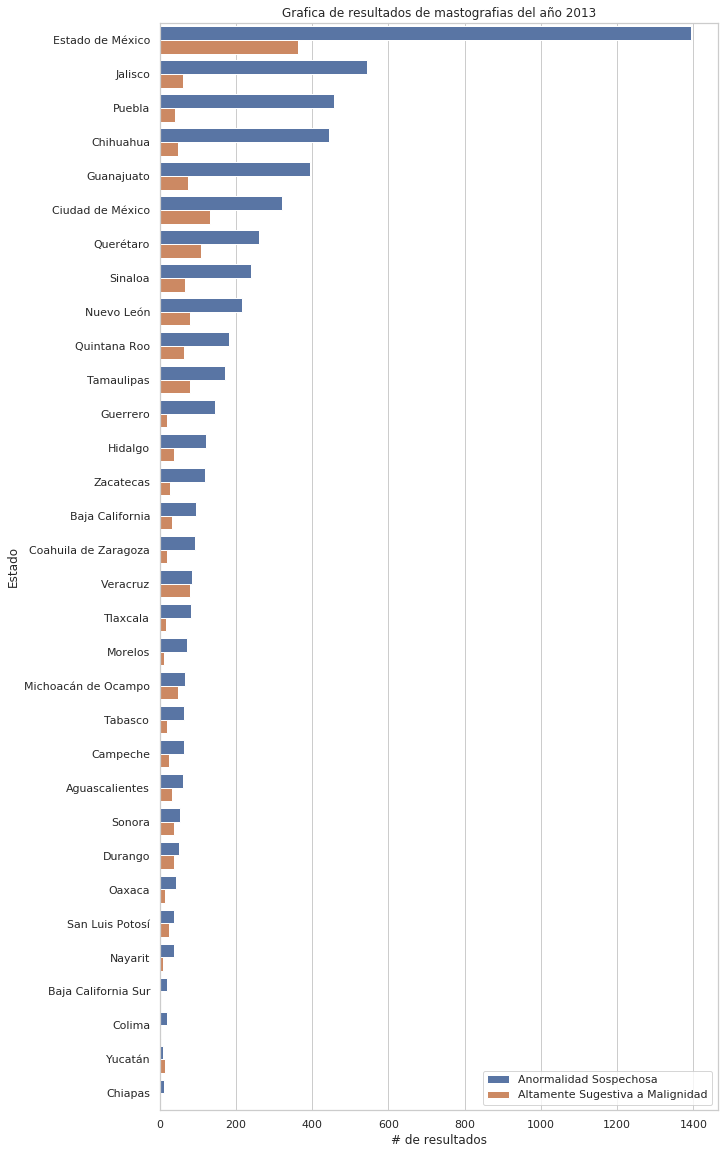

In [14]:
d_sicam13_agrupada = d_sicam13_agrupada[(d_sicam13_agrupada['resultado'] != 'Probablemente Benigna') 
                                          & (d_sicam13_agrupada['resultado'] != 'Evaluación Adicional')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam13_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2013')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

Así, vemos que la entidad donde se han encontrado más tumores benignos es el Estado de México en el 2013.

Ahora, se nos presenta un problema, hacer graficas de barras oara cada uno de los años podría saturar de barras por todos lados, es por eso que para hacer más dinamico todo, usaremos mapas.

In [15]:
# cargamos el geojson con la geometria de los estados de México
mexico = '../Equipo_2_P2_Analisis/DATA/mexico.json'
fname = mexico
mxn = gpd.read_file(fname)
mxn = mxn[1:][['name', 'geometry']]
mxn = mxn.rename(columns= {'name': 'estado'})
mxn

,estado,geometry
1,Baja California,"MULTIPOLYGON (((-114.14750 28.00015, -114.2070..."
2,Baja California Sur,"MULTIPOLYGON (((-109.79843 24.15516, -109.8624..."
3,Coahuila,"POLYGON ((-99.80696 27.77142, -99.96720 27.640..."
4,Chihuahua,"POLYGON ((-106.50605 31.77026, -106.42895 31.7..."
5,Durango,"POLYGON ((-103.62726 26.64393, -103.32570 26.4..."
6,Sinaloa,"MULTIPOLYGON (((-108.88272 25.44318, -108.8188..."
7,Sonora,"MULTIPOLYGON (((-109.23137 26.26342, -109.2254..."
8,Zacatecas,"POLYGON ((-100.82844 24.56496, -100.86968 24.4..."
9,Nuevo León,"POLYGON ((-99.80696 27.77142, -99.74044 27.722..."
10,San Luis Potosí,"POLYGON ((-100.05727 23.24106, -100.08926 23.1..."


In [29]:
# Usando el dataset agrupado, podemos ver los estados que más matografia
# realizaron y sus respectivos resultados.
renombre = {
    'Coahuila de Zaragoza': 'Coahuila',
    'Ciudad de México': 'Distrito Federal',
    'Michoacán de Ocampo': 'Michoacán',
    'Veracruz de Ignacio de la Llave': 'Veracruz',
    'Estado de México': 'México'
}
d_sicam13_agrupada = d_sicam13.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam13_agrupada = d_sicam13_agrupada.rename(columns = {'estado': 'count'}).reset_index()
d_sicam13_agrupada = d_sicam13_agrupada.replace({"estado": renombre})

In [64]:
res = pd.unique(d_sicam13_agrupada['resultado'])


In [63]:
# usando folium realizamos el mapa con diferentes capas
mymap =  folium.Map(location=[25, -100], zoom_start=4.3, width="100%", height='100%')

for i in range(0,len(res)):
    folium.Choropleth(
        geo_data = mxn,
        name=f'Resultados mastografias {res[i]}',
        data=d_sicam13_agrupada[d_sicam13_agrupada['resultado']  == res[i]],
        columns=['estado', 'count'],
        key_on='feature.properties.estado',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Resultados mastografias {res[i]}'
    ).add_to(mymap)

folium.LayerControl().add_to(mymap)

mymap



### Ahora, se analiza el siguiente dataset contenido en pdf: 

### Ahora procederé a hacer el análogo con los demás datasets del SICAM.

In [ ]:
#ahora agrupo por resultado de mastografía y estado:
d_sicam14 = pd.read_csv("../Equipo_2_P2_Analisis/DATA/SICAM_DATA/Mastografias 2014.csv", encoding = 'latin-1', header = 1)
d_sicam14 = d_sicam14.drop(columns = columnas)

d_sicam14 = d_sicam14.rename(columns = c_rename)
d_sicam14 = d_sicam14.dropna()

d_sicam14_agrupada = d_sicam14.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam14_agrupada = d_sicam14_agrupada.rename(columns = {'estado': 'count'}).reset_index()
d_sicam14_agrupada.head()

Ya que la simple tabla no nos dice mucho al respecto, usaremos graficos de barras para poder observar que estados de la Republica Mexicana presentan una alta sugestiva a malignidad.

In [ ]:
d_sicam14_agrupada = d_sicam14_agrupada.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam14_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2014')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

Como podemos observar la mayoria de los resultados arrojan un resultado negativo o con un tumor benigno, pero veamos como se comportan los datos sin esos resultados  

In [ ]:
d_sicam14_agrupada = d_sicam14_agrupada[(d_sicam14_agrupada['resultado'] != 'Benigna') 
                                        & (d_sicam14_agrupada['resultado'] != 'Negativa')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam14_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2014')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

Los datos de nuevo nos presentan una baja incidencia de casos con respecto a la evaluacion adicional y la probabilidad de un tumor benigno, entonces, reduciremos nuestros datos unicamente a aquellos que se presentan como tumores con alta sugestiva a malignidad o anormalidades sospechosas.

In [ ]:
d_sicam14_agrupada = d_sicam14_agrupada[(d_sicam14_agrupada['resultado'] != 'Probablemente Benigna') 
                                          & (d_sicam14_agrupada['resultado'] != 'Evaluación Adicional')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam14_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2014')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

En el 2014 se observa claramente que el cancér es mucho más común en el EDOMEX

In [ ]:
#ahora agrupo por resultado de mastografía y estado:
d_sicam15 = pd.read_csv("../Equipo_2_P2_Analisis/DATA/SICAM_DATA/Mastografias 2015.csv", 
                        encoding = 'latin-1', header = 1, low_memory=False)
d_sicam15 = d_sicam15.drop(columns = columnas)

d_sicam15 = d_sicam15.rename(columns = c_rename)
d_sicam15 = d_sicam15.dropna()

d_sicam15_agrupada = d_sicam15.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam15_agrupada = d_sicam15_agrupada.rename(columns = {'estado': 'count'}).reset_index()
d_sicam15_agrupada.head()

In [ ]:
d_sicam15_agrupada = d_sicam15_agrupada.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam15_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2015')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

In [ ]:
d_sicam15_agrupada = d_sicam15_agrupada[(d_sicam15_agrupada['resultado'] != 'Benigna') 
                                        & (d_sicam15_agrupada['resultado'] != 'Negativa')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam15_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2015')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

Los datos de nuevo nos presentan una baja incidencia de casos con respecto a la evaluacion adicional y la probabilidad de un tumor benigno, entonces, reduciremos nuestros datos unicamente a aquellos que se presentan como tumores con alta sugestiva a malignidad o anormalidades sospechosas.

In [ ]:
d_sicam15_agrupada = d_sicam15_agrupada[(d_sicam15_agrupada['resultado'] != 'Probablemente Benigna') 
                                          & (d_sicam15_agrupada['resultado'] != 'Evaluación Adicional')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam15_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2015')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

En el 2015 es preocupante el aumento de casos altamente sugestivos a malignidad en el estado de Nuevo León, pues on respecto a los años anteriores el aumento fue de forma abrupta.

In [ ]:
#ahora agrupo por resultado de mastografía y estado:
d_sicam16 = pd.read_csv("../Equipo_2_P2_Analisis/DATA/SICAM_DATA/Mastografias 2016.csv", 
                        encoding = 'latin-1', header = 1, low_memory=False)
d_sicam16 = d_sicam16.drop(columns = columnas)

d_sicam16 = d_sicam16.rename(columns = c_rename)
d_sicam16 = d_sicam16.dropna()

d_sicam16_agrupada = d_sicam16.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam16_agrupada = d_sicam16_agrupada.rename(columns = {'estado': 'count'}).reset_index()
d_sicam16_agrupada.head()

In [ ]:
d_sicam16_agrupada = d_sicam16_agrupada.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam16_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2016')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

In [ ]:
d_sicam16_agrupada = d_sicam16_agrupada[(d_sicam16_agrupada['resultado'] != 'Benigna') 
                                        & (d_sicam16_agrupada['resultado'] != 'Negativa')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam16_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2016')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

In [ ]:
d_sicam16_agrupada = d_sicam16_agrupada[(d_sicam16_agrupada['resultado'] != 'Probablemente Benigna') 
                                          & (d_sicam16_agrupada['resultado'] != 'Evaluación Adicional')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam16_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2016')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

En el 2016 presenta una incidencia mayor de nuevo en el EDOMEX.

In [ ]:
#ahora agrupo por resultado de mastografía y estado:
d_sicam17 = pd.read_csv("../Equipo_2_P2_Analisis/DATA/SICAM_DATA/Mastografias 2017.csv", 
                        encoding = 'latin-1', header = 1, low_memory=False)
d_sicam17 = d_sicam17.drop(columns = columnas)

d_sicam17 = d_sicam17.rename(columns = c_rename)
d_sicam17 = d_sicam17.dropna()

d_sicam17_agrupada = d_sicam17.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam17_agrupada = d_sicam17_agrupada.rename(columns = {'estado': 'count'}).reset_index()
d_sicam17_agrupada.head()

In [ ]:
d_sicam17_agrupada = d_sicam17_agrupada.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam17_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2017')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

In [ ]:
d_sicam17_agrupada = d_sicam17_agrupada[(d_sicam17_agrupada['resultado'] != 'Benigna') 
                                        & (d_sicam17_agrupada['resultado'] != 'Negativa')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam17_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2017')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

In [ ]:
d_sicam17_agrupada = d_sicam17_agrupada[(d_sicam17_agrupada['resultado'] != 'Probablemente Benigna') 
                                          & (d_sicam17_agrupada['resultado'] != 'Evaluación Adicional')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam17_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2017')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

En el 2017 la CDMX tuvo el mayor numero de resultados altamente sugestivos a malignidad, mientras que el EDOMEX vuelve a encabezar en anormalidad sospechosa

In [ ]:
#ahora agrupo por resultado de mastografía y estado:
d_sicam19 = pd.read_csv("../Equipo_2_P2_Analisis/DATA/SICAM_DATA/Mastografias 2019.csv", 
                        encoding = 'latin-1', header = 1, low_memory=False)
d_sicam19 = d_sicam19.drop(columns = columnas)

d_sicam19 = d_sicam19.rename(columns = c_rename)
d_sicam19 = d_sicam19.dropna()

d_sicam19_agrupada = d_sicam19.groupby(["resultado", "estado"])[["estado"]].agg("count")
d_sicam19_agrupada = d_sicam19_agrupada.rename(columns = {'estado': 'count'}).reset_index()
d_sicam19_agrupada.head()

In [ ]:
d_sicam19_agrupada = d_sicam19_agrupada.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam19_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2019')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

In [ ]:
d_sicam19_agrupada = d_sicam19_agrupada[(d_sicam19_agrupada['resultado'] != 'Benigna') 
                                        & (d_sicam19_agrupada['resultado'] != 'Negativa')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam19_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2019')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

In [ ]:
d_sicam19_agrupada = d_sicam19_agrupada[(d_sicam19_agrupada['resultado'] != 'Probablemente Benigna') 
                                          & (d_sicam19_agrupada['resultado'] != 'Evaluación Adicional')]

fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=d_sicam19_agrupada, orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2019')
plt.legend(loc='lower right')
ax.set(xlabel='# de resultados', ylabel='Estado');

En el 2019 el EDOMEX vuelve a encabezar en anormalidad sospechosa, pero para este año Michoacan supero a la CDMX en anormalidades sospechosas

### ahora veamos el conteo con respecto al tiempo: 

In [ ]:
conteo = {'Año': list(range(2013, 2020)), 
          'Numero de pruebas': [d_sicam13.count()[0], d_sicam14.count()[0], d_sicam15.count()[0], 
                                d_sicam16.count()[0], d_sicam17.count()[0], np.nan, d_sicam19.count()[0]]}
conteo = pd.DataFrame(conteo)


fig = plt.figure(figsize=(12,7))
ax = sns.barplot(x='Año', y='Numero de pruebas', data=conteo)
ax.set_title('Total de pruebas realizadas por año')
ax.set(ylabel='Total de mastografias');

Podemos observar claramente que en el 2018 no se tienen datos pues la liga de descarga se encontraba caida, además podemos observar que en el 2015 y el 2016 fueron los años con mayor numeros de mastografias. Seria bueno preguntarse el porque el numero se ha reducido en lugar de aumentar...



## Juntar los datasets
Se realizara un dataset enorme para pooder obtener graficos de a cuerdo a la edad, entidad federativa, mastografia y resltado

In [ ]:
masto = d_sicam13.append([d_sicam14, d_sicam15, d_sicam16, d_sicam17, d_sicam19]).reset_index(drop=True)
masto.tail()

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = sns.histplot(data=masto, x="edad", hue='resultado', binwidth=3, multiple='stack')
ax.set(title='Edades de personas con estudios de mastografia entre 2013 y 2019', xlabel='edad', ylabel='conteo');

In [ ]:
# ahora analizaremos los datos donde tenemos sospechas, que se encuentran un poco
# ocultos por los beningnos y positivos

masto_malig = masto[(masto['resultado'] != 'Negativa') & (masto['resultado'] !='Evaluación Adicional')
     & (masto['resultado'] != 'Benigna') & (masto['resultado'] != 'Probablemente Benigna')]

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = sns.histplot(data=masto_malig, x="edad", hue='resultado', binwidth=3, multiple='stack')
ax.set(title='Edades de personas con estudios de mastografia entre 2013 y 2019', 
       xlabel='edad', ylabel='conteo');

In [ ]:
masto_group = masto.groupby(["resultado", "estado"])[["estado"]].agg("count")
masto_group = masto_group.rename(columns = {'estado': 'count'}).reset_index()
masto_group.head(2)

In [1]:
masto_group_agre = masto_group[masto_group['resultado'] == 'Altamente Sugestiva a Malignidad']
masto_group_agre = masto_group_agre.sort_values(by='count', ascending=False)

masto_group_beni = masto_group[masto_group['resultado'] == 'Benigna']
masto_group_beni = masto_group_beni.sort_values(by='count', ascending=False)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,10))
fig.suptitle('Graficos de mastografias')
fig.tight_layout(pad=9)
sns.barplot(x='count', y='estado', data=masto_group_agre, orient='h', palette="Blues_d", ax=axes[0])
axes[0].set_title('Grafica de tumores altamente sugestivos a malignidad')
axes[0].set(xlabel='# de resultados', ylabel='Estado')
axes[0].locator_params(axis='x', nbins=10)
sns.barplot(x='count', y='estado', data=masto_group_beni, orient='h', palette="Blues_d", ax=axes[1])
axes[1].set_title('Grafica de tumores benignos')
axes[1].set(xlabel='# de resultados', ylabel='')
axes[1].locator_params(axis='x', nbins=5);

NameError: name 'masto_group' is not defined

Del 2013 al 2019 podemos observar que los estados más afectados por el cáncer son:
* Nuevo León
* Estado de México
* Ciudad de México

La diference que hay entre Tamaulipas y Ciudad de México es de varios cientos de tumores altamente sugestivos a malignidad. Por lo que los estados mencionados anteriormente presentan una más alta suceptibilidad a estos resultados, sin embargo, para poder concluir esto es necesario analizar su densidad poblacional, que claramente, también mayor en estos estados.


A continuación se presenta el mapa donde podemos observar que estados estan más afectados por tumores altamente sugestivos a malignidad.

In [ ]:
mexico = '../Equipo_2_P2_Analisis/DATA/mexico.json'
fname = mexico
mxn = gpd.read_file(fname)
mxn = mxn[1:][['name', 'geometry']]
mxn = mxn.rename(columns= {'name': 'estado'})
mxn

In [ ]:
renombre = {
    'Coahuila de Zaragoza': 'Coahuila',
    'Ciudad de México': 'Distrito Federal',
    'Michoacán de Ocampo': 'Michoacán',
    'Veracruz de Ignacio de la Llave': 'Veracruz',
    'Estado de México': 'México'
}
masto_group_agre = masto_group_agre.drop(columns='resultado').rename(columns={'count': 'agre_count'})
masto_group_agre = masto_group_agre.replace({"estado": renombre})
masto_group_beni = masto_group_beni.drop(columns='resultado').rename(columns={'count': 'beni_count'})
masto_group_beni = masto_group_beni.replace({"estado": renombre})
masto_group_agre = masto_group_agre.merge(masto_group_beni, on='estado')
masto_group_agre.head()

In [ ]:
masto_mxn = mxn.merge(masto_group_agre,on="estado")
masto_mxn
masto_mxn.head()

In [ ]:
mymap =  folium.Map(location=[25, -100], zoom_start=4.5, width="100%", height='100%')
myscale = (masto_mxn['agre_count'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
myscale2 = (masto_mxn['beni_count'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()


folium.Choropleth(
    geo_data=masto_mxn,
    name='Agre',
     data=masto_mxn,
     columns=['estado','agre_count'],
     key_on="feature.properties.estado",
     fill_color='YlGnBu',
     threshold_scale=myscale,
     fill_opacity=1,
     line_opacity=0.2,
     legend_name='Tumores altamente sugestivos a malignidad',
     smooth_factor=0
).add_to(mymap)

folium.Choropleth(
    geo_data=masto_mxn,
    name='Beni',
     data=masto_mxn,
     columns=['estado','beni_count'],
     key_on="feature.properties.estado",
     fill_color='YlGnBu',
     threshold_scale=myscale2,
     fill_opacity=1,
     line_opacity=0.2,
     legend_name='Tumores benignos',
     smooth_factor=0
).add_to(mymap)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
MXN = folium.features.GeoJson(
    masto_mxn,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['estado','agre_count'],
        aliases=['Estado: ','Tumores altamente sugestivos a malignidad: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

MXN2 = folium.features.GeoJson(
    masto_mxn,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['estado','beni_count'],
        aliases=['Estado: ','Tumores benignos: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap.add_child(MXN)
mymap.add_child(MXN2)
# mymap.keep_in_front(MXN)
# mymap.keep_in_front(MXN2)
folium.LayerControl(collapsed=False).add_to(mymap)
mymap

### Ahora, se analiza el siguiente dataset contenido en pdf: 

##### Mientras buscaba los datos de mortabilidad asociados al cancer de mama, pude darme cuenta que solo habían datos accesibles en formato ```pdf``` por esta razón, tuve que transformar los datos a ```csv```, para esto usé la paquetería ```tabula``` y realicé una función para automatizar la transformación de los archivos correspondientes: 

In [ ]:
#imoporto la librería y hago una prueba con un archivo:
from tabula import convert_into
convert_into("d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/pdf/morbilidad_2013.pdf", 
             "d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/test.csv", output_format="csv")

In [ ]:
#defino mi transformador
def transformador(file, salida): 
    d = convert_into(file, salida, output_format = 'csv')
    return d

In [ ]:
#creo listas con los nombres de los archivos correspondientes: 
lista_pdf = []
lista_csv = []
for i in range(3, 10):
    lista_pdf.append(f"d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/pdf/morbilidad_201{i}.pdf")
    lista_csv.append(f"d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/morbilidad_201{i}.csv")
    
print(lista_pdf, '\n', lista_csv)

In [ ]:
#transformo en el rango de mis listas
for i in range(0,len(lista_pdf)):
    transformador(lista_pdf[i], lista_csv[i])

Datos disponibles en la fuente: SALUD, Dirección General de Epidemiología (DGE). (2020). Anuarios de Morbilidad 1984-2019. Disponible en: https://epidemiologia.salud.gob.mx/anuario/html/incidencia_enfermedad.html

In [ ]:
# ahora procedo a realizar una limpieza de las mismas: 

morbilidad_13 = pd.read_csv('d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/morbilidad_2013.csv', 
                            encoding = 'latin-1', header = 2)
morbilidad_13.head()

#### como podemos ver este DS no tiene muchos inconvenientes, pues aunque presenta valores nulos 0, estos sí son representativos de las muestras, es decir que tienen significado.
#### el único problema verdadero es que dos columnas no tienen nombre, entonces se procede a nombrar: 

In [ ]:
dicc_nombre = {
    'Unnamed: 0': 'estado',
    'Unnamed: 12': 'incidencia'
}

morbilidad_13 = morbilidad_13.rename(columns = dicc_nombre)

morbilidad_13.head()

#### además de esto ahora voy a indexar comenzando por el estado que tiene la incidencia más alta:

In [ ]:
morbilidad_13 = morbilidad_13.sort_values(by="incidencia",ascending =False).reset_index(drop = True)
morbilidad_13.head(5)

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = sns.histplot(data=morbilidad_13, x="incidencia")
ax.set(title='Edades de personas con estudios de mastografia entre 2013 y 2019', 
       xlabel='edad', ylabel='conteo');

### Ahora hago lo mismo para los demás DS

In [ ]:
morbilidad_14 = pd.read_csv('d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/morbilidad_2014.csv', 
                            encoding = 'latin-1', header = 2)
morbilidad_14 = morbilidad_14.rename(columns = dicc_nombre)
morbilidad_14 = morbilidad_14.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

# como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric,
# exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_14))):
    if elemento != 0:
        morbilidad_14.iloc[:, elemento] = pd.to_numeric(morbilidad_14.iloc[: ,elemento], 
                                                        errors = 'coerce').fillna(value = 0)

# morbilidad_14['estado'] = estado
morbilidad_14.head(5)

In [ ]:
morbilidad_15 = pd.read_csv('d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/morbilidad_2015.csv', 
                            encoding = 'latin-1', header = 2)
morbilidad_15 = morbilidad_15.rename(columns = dicc_nombre)
morbilidad_15 = morbilidad_15.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

# como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, 
# exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_15))):
    if elemento != 0:
        morbilidad_15.iloc[:, elemento] = pd.to_numeric(morbilidad_15.iloc[: ,elemento], 
                                                        errors = 'coerce').fillna(value = 0)

# morbilidad_15['estado'] = estado
morbilidad_15.head(5)

In [ ]:
morbilidad_16 = pd.read_csv('d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/morbilidad_2016.csv', 
                            encoding = 'latin-1', header = 2)
morbilidad_16 = morbilidad_16.rename(columns = dicc_nombre)
morbilidad_16 = morbilidad_16.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

# como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, 
# exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_16))):
    if elemento != 0:
        morbilidad_16.iloc[:, elemento] = pd.to_numeric(morbilidad_16.iloc[: ,elemento], 
                                                        errors = 'coerce').fillna(value = 0)

# morbilidad_16['estado'] = estado
morbilidad_16.head(5)

In [ ]:
morbilidad_17 = pd.read_csv('d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/morbilidad_2017.csv', 
                            encoding = 'latin-1', header = 2)
morbilidad_17 = morbilidad_17.rename(columns = dicc_nombre)
morbilidad_17 = morbilidad_17.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

# como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, 
# exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_17))):
    if elemento != 0:
        morbilidad_17.iloc[:, elemento] = pd.to_numeric(morbilidad_17.iloc[: ,elemento], 
                                                        errors = 'coerce').fillna(value = 0)

# morbilidad_17['estado'] = estado
morbilidad_17.head(5)

In [ ]:
morbilidad_18 = pd.read_csv('d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/morbilidad_2018.csv', 
                            encoding = 'latin-1', header = 2)
morbilidad_18 = morbilidad_18.rename(columns = dicc_nombre)
morbilidad_18 = morbilidad_18.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

# como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric, 
# exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_18))):
    if elemento != 0:
        morbilidad_18.iloc[:, elemento] = pd.to_numeric(morbilidad_18.iloc[: ,elemento], 
                                                        errors = 'coerce').fillna(value = 0)

# morbilidad_18['estado'] = estado
morbilidad_18.head(5)

In [ ]:
morbilidad_19 = pd.read_csv('d:/Equipo_2_P2/DATA/Morbilidad_2013_2019/csv/morbilidad_2019.csv', 
                            encoding = 'latin-1', header = 2)
morbilidad_19 = morbilidad_19.rename(columns = dicc_nombre)
morbilidad_19 = morbilidad_19.sort_values(by="incidencia",ascending =False).reset_index(drop = True)

# como me encontré unos "N.A" dentro de algunas columnas las limpie usando .to_numeric,
# exceptuando la primer fila, que es la de los estados
for elemento in range(0, len(list(morbilidad_19))):
    if elemento != 0:
        morbilidad_19.iloc[:, elemento] = pd.to_numeric(morbilidad_19.iloc[: ,elemento], 
                                                        errors = 'coerce').fillna(value = 0)

# morbilidad_19['estado'] = estado
morbilidad_19.head(5)

### De la lectura de los DS podemos ver de manera inmediata que el índice ha incrementado con los años y el estado que encabeza el índice de morbilidad es Campeche, por lo que podría ser otro target para comenzar una campaña de divulgación en la prevención del cáncer de mama.

### **Pregunta de investigación 2**
#### **2. ¿Cuál es la relación entre los gastos de salud y los resultados en su política en la lucha contra el cáncer?**

En esta sección indagaremos cual ha sido el presupuesto para salud por estado de la República Mexicana y lo relacionaremos con los índices de mortalidad por cáncer de mama, con el fin de dilucidar si la dotación de presupuesto para combatir esta enfermedad ha sido adecuada.


#### **Dataset 1:**
Gasto en Salud en el Sistema Nacional de Salud, México
- Observaciones: Estados de la República
- Periodo: 1993-2017
- Archivo: "1._GFF_01_2017_A_CONS_O.csv"
- Fuente: Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA).

##### **I. Carga de datos**

In [ ]:
### PRIMER DATASET: DGIS (2019). "Gasto en Salud, 1993-2017 (miles de pesos constantes, 2017=100)"
## I.Cargar datos en formato csv
#ADVERTENCIA: Archivo en  latin-1
gasto_salud = pd.read_csv("https://raw.githubusercontent.com/Zoe-Garcia/Equipo_2_P2/main/DATA/SSA%20Mexico/1._GFF_01_2017_A_CONS_O.csv", sep=',', encoding='latin-1')
gasto_salud.head()

##### **II. Limpieza de datos**

In [ ]:
##. II.Conocer DDBB y limpiarla
#Conocer tipo de datos y características generales del DataFrame
gasto_salud.shape

In [ ]:
#Tipo de datos
gasto_salud.dtypes

In [ ]:
#Columnas
gasto_salud.columns

In [ ]:
#Contar NaN
gasto_salud.isna()

In [ ]:
#Sumar NaN por columna
gasto_salud.isna().sum(axis=0)
#Nota: Columnas "Unnamed" contienen 833 NaN

In [ ]:
#Sumar NaN por fila
gasto_salud.isna().sum(axis=1)

In [ ]:
#Eliminar columnas con todos los valores NaN
gasto_salud.dropna(axis=1, how='all')
#Nota: Este proceso elimina las columnas sin datos desde 'Unnamed: 31' hasta 'Unnamed: 65'

In [ ]:
#Guardar cambios de eliminación de columnas NaN en Data Frame
gasto_salud_drop = gasto_salud.dropna(axis=1, how='all')
gasto_salud_drop

In [ ]:
#Sin embargo, aparecen valores "n.d. que son en realidad "NaN"
#Remplazar n.d. por NaN para tener el verdadero conteo de nulos
gasto_salud_drop = gasto_salud_drop.replace('n.d.', np.NaN)
gasto_salud_drop.head()

In [ ]:
#Repetir el proceso anterior de limpieza de columnas con NaN
gasto_salud_drop = gasto_salud_drop.dropna(axis=1, how='all')
gasto_salud_drop.head(4)

In [ ]:
#Eliminar filas con todos los valores NaN
gasto_salud_drop.dropna(axis=0, how='all')
#Nota: Este proceso elimina la úlitma fila sin información, índice 832

In [ ]:
#Guardar cambios de eliminación de fila NaN en Data Frame
gasto_salud_drop = gasto_salud_drop.dropna(axis=0, how='all')
gasto_salud_drop.tail()

In [ ]:
#Contar nuevamente los NaN
gasto_salud_drop.isna().sum(axis=0)

In [ ]:
#Aún existen columnas con demasiados NaN. Asimismo, dichas columnas no son tan relevantes
#Se eliminan dichas columnas para poder tener un mejor análisis
gasto_salud_drop = gasto_salud_drop.drop(['Gasto Total en Salud\n(I.1 + I.2)', 
                                          'C. IMSS \nProspera', 'D. SEDENA\n(Ramo 7)', 
                                          'E. SEMAR\n(Ramo 13)', 'D. ISSFAM', 'E. ISSES', 
                                          'I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C)', 
                                          'A. Gasto de los Hogares e ISFL', 
                                          'Gasto total en salud como % del PIB', 
                                          'Gasto público total en salud como % del gasto total en salud', 
                                          'Gasto privado en salud per cápita'], axis=1)

In [ ]:
#Contar nuevamente los NaN
gasto_salud_drop.isna().sum(axis=0)

In [ ]:
#Evaluar nuevamente los NaN por fila
gasto_salud.isna().sum(axis=1)

In [ ]:
#Identificar fila donde inicia año 2000
gasto_salud_drop.iloc[238]

In [ ]:
# Eliminar filas con muchos NaN, correspondientes a los años 1993-1999, 
# para igualar periodo con el Segundo DataFrame sobre mortalidad
gasto_salud_drop = gasto_salud_drop.drop(gasto_salud_drop.index[range(238)])

In [ ]:
gasto_salud_drop.head()

In [ ]:
#Evaluar nuevamente los NaN por columna
gasto_salud_drop.isna().sum(axis=0)

In [ ]:
#Repetir proceso de eliminación de columnas con NaN numerosas
gasto_salud_drop = gasto_salud_drop.drop(['C. PEMEX'], axis=1)
gasto_salud_drop.head(3)

In [ ]:
#Convertir en 0 los NaN de columnas 'F. Gasto \nEstatal' y 'B. Cuotas de Recuperación'
gasto_salud_drop['F. Gasto \nEstatal'] = gasto_salud_drop['F. Gasto \nEstatal'].fillna(0)
gasto_salud_drop['B. Cuotas de Recuperación'] = gasto_salud_drop['B. Cuotas de Recuperación'].fillna(0)

In [ ]:
#Evaluar nuevamente los NaN por columna
gasto_salud_drop.isna().sum(axis=0)
#Nota: Obtenemos 0 NaN

In [ ]:
# Tipo de datos
gasto_salud_drop.dtypes

In [ ]:
#Convertir 'Año' en datetime
gasto_salud_drop['Año'] = gasto_salud_drop['Año'].apply(np.int64)
gasto_salud_drop['Año'] = pd.to_datetime(gasto_salud_drop['Año'].astype(str), format='%Y')
gasto_salud_drop.head()

In [ ]:
# Nuevamente revisamos el tipo de datos
gasto_salud_drop.dtypes

In [ ]:
#Convertir datos object en numéricos
gasto_salud_drop['B. FASSA (Ramo 33)'] = gasto_salud_drop['B. FASSA (Ramo 33)'].apply(np.float64)
gasto_salud_drop['F. Gasto \nEstatal'] = gasto_salud_drop['F. Gasto \nEstatal'].apply(np.float64)
gasto_salud_drop['B. Cuotas de Recuperación'] = gasto_salud_drop['B. Cuotas de Recuperación'].apply(np.float64)
gasto_salud_drop['C. Pago de Primas'] = gasto_salud_drop['C. Pago de Primas'].apply(np.float64)
gasto_salud_drop['Gasto público total en salud como % del gasto público total'] = gasto_salud_drop['Gasto público total en salud como % del gasto público total'].apply(np.float64)
gasto_salud_drop['Gasto público en salud per cápita para población con seguridad social'] = gasto_salud_drop['Gasto público en salud per cápita para población con seguridad social'].apply(np.float64)
gasto_salud_drop['Gasto público en salud per cápita para población sin seguridad social '] = gasto_salud_drop['Gasto público en salud per cápita para población sin seguridad social '].apply(np.float64)
gasto_salud_drop['Aportación federal al financiamiento de la salud de la población sin seguridad social (%)'] = gasto_salud_drop['Aportación federal al financiamiento de la salud de la población sin seguridad social (%)'].apply(np.float64)

In [ ]:
#Nuevamente revisamos el tipo de datos
gasto_salud_drop.dtypes
#Todos los tipos de datos object se modificaron correctamente a float64

In [ ]:
#Dimensión del DataFrame final
gasto_salud_drop.shape
#594 x 19

In [ ]:
gasto_salud_drop.columns

In [ ]:
#Renombrar columnas: primer paso, crear mapa
column_name_mapping = {
    'Entidad Federativa' : 'Estado', 
    'Año' : 'Año',
       'Producto Interno Bruto                       (Miles de pesos)' : 'PIB en miles de pesos',
       'I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)' : 'Total gasto público en salud',
       '1. Gasto Total \n(A+B+C+D+E+F) con SS' : 'Subtotal no asegurados',
       'A. Advo. Secretaria de Salud\n(Ramo 12)' : 'Gasto administrativo SSA', 
       'B. FASSA (Ramo 33)' : 'Aportaciones federales',
       'F. Gasto \nEstatal' : 'Gasto estatal en salud', 
       '2. Gasto Total\n(A+B+C+D+E) sin SS' : 'Subtotal asegurados', 
       'A. IMSS' : 'IMSS',
       'B. ISSSTE' : 'ISSSTE', 
       'B. Cuotas de Recuperación' : 'Cuotas de recuperación', 
       'C. Pago de Primas' : 'Primas de seguros médicos',
       'Gasto  público total en salud como % del PIB' : 'Total gasto en salud % PIB',
       'Gasto público total en salud como % del gasto público total' : 'Total gasto en salud % gasto público',
       'Gasto público en salud per cápita para población con seguridad social' : 'Gasto en salud asegurados per cápita',
       'Gasto público en salud per cápita para población sin seguridad social ' : 'Gasto en salud no asegurados per cápita',
       'Gasto público en salud per cápita total' : 'Total gasto en salud per cápita',
       'Aportación federal al financiamiento de la salud de la población sin seguridad social (%)' : 'Aportación federal % no asegurados'
}

In [ ]:
#Renombrar columnas: segundo paso, rename
gasto_salud_rename = gasto_salud_drop.rename(columns=column_name_mapping)
gasto_salud_rename.head()

In [ ]:
#Cambiar índice a Multi-índice jerárquico tipo: Lugar, Año
gasto_salud_rename = gasto_salud_rename.set_index(['Estado', 'Año'])

In [ ]:
#Revisar multi-índice, por ejemplo las filas correspondientes al total nacional con el índice 'Estados Unidos Mexicanos'
gasto_salud_rename.loc[('Estados Unidos Mexicanos' , )]

##### **III. Procesamiento y exploración de datos**

In [ ]:
## III. Análisis exploratorio de datos
import statistics
gasto_salud_rename.info()

In [ ]:
#Estadística descriptiva
gasto_salud_rename.sum()

In [ ]:
#Minimo
gasto_salud_rename.min()

In [ ]:
#Máximo
gasto_salud_rename.max()

In [ ]:
#Estadística descriptiva
gasto_salud_rename.describe().loc[["mean", "std"]].T

In [ ]:
gasto_salud_por_estado = gasto_salud_rename.groupby('Estado')['Total gasto público en salud'].agg(pd.Series.mean)
gasto_salud_por_estado.head()

In [ ]:
#Visualización
gasto_salud_por_estado.plot(kind='bar', subplots=True)

#### **Dataset 2:**
Mortalidad cáncer de mama, México
- Observaciones: Estados de la República
- Periodo: 2000-2015
- Archivo: "MortalidadCaMa2000a2015.csv"
- Fuente: Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA)
- Descripción: Defunciones de mujeres de 25 años y más por tumor maligno de mama (C50), 2000-2015

##### **I. Carga de datos**

In [ ]:
### SEGUNDO DATASET: 
## I.Cargar datos en formato csv
#NOTA: Archivo en  latin-1
mortalidad = pd.read_csv("https://raw.githubusercontent.com/Zoe-Garcia/Equipo_2_P2/main/DATA/SSA%20Mexico/MortalidadCaMa2000a2015.csv", sep=',', encoding='latin-1')
mortalidad.head()

##### **II. Limpieza de datos**

In [ ]:
##. II.Conocer DDBB y limpiarla
#Conocer tipo de datos y características generales del DataFrame
mortalidad.shape

In [ ]:
#Tipo de datos
mortalidad.dtypes
#Nota: Los datos son numéricos

In [ ]:
#Información de DataFrame
mortalidad.info

In [ ]:
#Contar los NaN por columna
mortalidad.isna().sum(axis=0)
#Nota: Este DataFrame no tiene datos nulos

In [ ]:
#Cambiar nombre
mortalidad_rename = mortalidad.rename(columns={'Entidad de Residencia' : 'Estado'})
mortalidad_rename.head()

In [ ]:
#Cambiar índice a 'Entidad de Residencia'
mortalidad_rename = mortalidad_rename.set_index(['Estado'])

In [ ]:
#Revisar cambio
mortalidad_rename.head()

##### **III. Procesamiento y exploración**

In [ ]:
## III. Análisis exploratorio de datos
mortalidad_rename.sum(axis=1)

In [ ]:
#Máximo
mortalidad_rename.max(axis=1)

In [ ]:
#Mínimo
mortalidad_rename.min(axis=1)

In [ ]:
#Estadística descriptiva
mortalidad_rename.describe().loc[["mean", "std"]].T

In [ ]:
#Visualización
mortalidad_rename.plot(kind='box', subplots=False)

###**Bases de datos:**
DGIS (9 de mayo de 2019). “Gasto en Salud, 1993-2017 (miles de pesos constantes, 2017=100)”, Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA), México. Recuperado de: http://www.dgis.salud.gob.mx/descargas/xls/1._GFF_01_2017_A_CONS_O.xlsx

DGIS (2 de diciembre de 2016). "Defunciones de mujeres de 25 años y más por tumor maligno de mama (C50), 2000-2015", Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA), México. Recuperado de: https://www.gob.mx/cms/uploads/attachment/file/269549/MortalidadCaMa2000a2015.pdf



### **Pregunta de investigación 3**
#### **2. ¿Qué factores influyen en la incidencia del cáncer de mama en mujeres?**

En esta sección indagaremos en los resultados obtenidos en mastografías realizadas en 2019, con el fin de comprobar si la edad de una mujer tiene incidencia en el desarrollo de cáncer de mama

In [ ]:
#Importacion de paquetes
import pandas as pd

 Dataset 1:

Resultados de Mastografías en México en 2019

In [ ]:
#carga de datos 
mastografias_2019 = pd.read_csv("/Mastografías 2019.csv",sep=",",encoding="latin-1",header=1)

In [ ]:
mastografias_2019.head(5)

In [ ]:
#Solo se seleccionan las columnas para el analisis
mastografias_2019_copia = mastografias_2019.copy()
mastografias_2019_copia = mastografias_2019_copia[["Edad","Fecha Interpretación Masto","Resultado"]]

In [ ]:
#Se buscan diferentes edades que existen en el df
mastografias_2019_copia['Edad'].unique()

In [ ]:
#se busca si existen valores NaN
mastografias_2019_copia.isna().sum(axis=0)

In [ ]:
#Eliminaciond valores NaN
mastografias_2019_copia = mastografias_2019_copia.dropna(axis=0)

In [ ]:
# Comprobacion de que se eliminaron los datos NaN
print(mastografias_2019_copia.isna().sum(axis=0))
print(mastografias_2019.shape)
print(mastografias_2019_copia.shape)

In [ ]:
# Se buscan los diferentes tipos de resultados que se obtuvieron
mastografias_2019_copia['Resultado'].unique()

In [ ]:
#Se realiza conteo de registros por resultado y edad
agrupacion_resultado = mastografias_2019_copia.groupby(["Resultado","Edad"])[["Edad"]].agg("count")
agrupacion_resultado

In [ ]:
#Promedio, mediana y desviación estandar de edad por cada tipo de resultado
print(mastografias_2019_copia.groupby(["Resultado"])[["Edad"]].agg(['mean', 'median', 'std']))
#Suma de registros por cada tipo de resultado
print(mastografias_2019_copia.groupby(["Resultado"])[["Edad"]].count().sort_values(by="Edad"))

## Resultado Benigno

In [ ]:
#Top10 de edades donde el resultado de la mastografía fue Benigno. 
agrupacion_resultado.columns =["Conteo"]
print("\n10 primeras edades donde el resultado es Benigno")
print(agrupacion_resultado.loc["Benigna"].sort_values(by="Conteo",ascending =False).head(10))
print("\n10 ultimas edades donde el resultado es Benigno")
print(agrupacion_resultado.loc["Benigna"].sort_values(by="Conteo",ascending =False).tail(10))

In [ ]:
# Analisis solo con mujeres mayores de 40 años
solo_mayores_40 = mastografias_2019_copia[mastografias_2019_copia["Edad"]>=40]
solo_mayores_40 = solo_mayores_40.groupby(["Resultado"])[["Edad"]].agg("count")
print(solo_mayores_40)
print("\nPorcentaje de resultado Bedigno: ")
print(((solo_mayores_40.loc["Benigna"].sum())/(agrupacion_resultado.loc[["Benigna"]].sum()))*100)

## Resultado entre intermedio y alto de Malignidad

In [ ]:
solo_mayores_40 = mastografias_2019_copia[mastografias_2019_copia["Edad"]>=40]
solo_mayores_40 = solo_mayores_40.groupby(["Resultado"])[["Edad"]].agg("count")
(solo_mayores_40.loc["Altamente Sugestiva a Malignidad"].sum())/(agrupacion_resultado.loc[["Altamente Sugestiva a Malignidad","Riesgo Intermedio de Malignidad"]].sum())

In [ ]:
#Top10 de edades donde el resultado de la mastografía fue Negativa. 
print("\n10 primeras edades donde se obtuvo como resultado un riesgo entre intermedio y alto de Malignidad")
print(agrupacion_resultado.loc[["Altamente Sugestiva a Malignidad","Riesgo Intermedio de Malignidad"]].sort_values(by ="Conteo",ascending =False).head(10))
print("\n10 ultimas edades donde se obtuvo como resultado un riesgo entre intermedio y alto de Malignidad")
print(agrupacion_resultado.loc[["Altamente Sugestiva a Malignidad","Riesgo Intermedio de Malignidad"]].sort_values(by="Conteo",ascending =False).tail(10))

### Analisis sin resultados Benignos

In [ ]:
sin_benignos = mastografias_2019_copia[mastografias_2019_copia["Resultado"]!="Benigna"]
#agrupacion
sin_benignos = sin_benignos.groupby(["Resultado"])[["Edad"]].agg("count")
print(sin_benignos)
print("\nPorcentaje de resultado Bedigno: ")
print(((sin_benignos.loc["Altamente Sugestiva a Malignidad"])/(sin_benignos["Edad"].sum()))*100)
print(((sin_benignos.loc["Riesgo Intermedio de Malignidad"])/(sin_benignos["Edad"].sum()))*100)

### Conclusion pregunta 3
Se puede observar que una gran parte de las personas que se realizaron una mastografía obtuvieron un resultado "Benigno", por otro lado, fijandonos en los resultados "Malignos" estos ocupan un porcentaje minimo en la muestra total, sin embargo se lográ apreciar que las mujeres mayores de 40 años son las más propensas a tener un resultado Maligno.

### **Bases de datos:**
Datos del Centro Nacional de Equidad de Género y Salud Reproductiva: 
 https://datos.gob.mx/busca/dataset/cancer-de-la-mujer-sicam-cancer-de-mama

## **Hipótesis:**

#### **¿Está México consciente de la problemática que trae consigo este problema de salud?**

### Para responder esta pregunta se tienen dos datasets que contienen informaciónk acerca de la divulgación o atención que se le da al tema 

### comenzando por los datos de google trends: 

In [ ]:
import matplotlib.pyplot as plt

interes_time = pd.read_csv('interes_cancer_de_mama_tema.csv', header = 1)
interes_time

In [ ]:
list(interes_time)

In [ ]:
#renombro las columnas:

nombres = {
    'Mes': 'fecha',
    'Cáncer de mama: (México)':'interes_en_cancer'
}

interes_time = interes_time.rename(columns = nombres)

#cambio el tipo de dato 'mes', por uno fecha:
interes_time['fecha'] = pd.to_datetime(interes_time['fecha'])

plt.plot(interes_time['fecha'], interes_time['interes_en_cancer'])

##### Así, el data set nos dice que la atención que se le ha dado al tema ha aumentado desde el 2012. Aun así, la atención que la población en general tiene acerca del problema no ha cambiado en los últimos años, lo que puede notarse con respecto al umento del índice de morbilidad, por ejemplo, ya que una alta atención en el tema implicaría que la población tiene conocimiento acerca de la prevención de esta enfermedad, por ejemplo.

### Ahora pasoa analizar los datos recopilados mediante WebScrapping:

### primero pondré aquí el código que usé para realizar el scrapping: 

```Python
from selenium import webdriver
import time
import numpy as np
from numpy import random

#despliego el navegador
options = webdriver.ChromeOptions()
options.add_argument('--disable-extensions')

PATH = "C:\Program Files (x86)\chromedriver.exe"

driver = webdriver.Chrome(PATH)
url = 'https://www.google.com/search?q=cáncer+de+mama&lr=&cr=countryMX&hl=es&as_qdr=all&tbs=ctr:countryMX,cdr:1,cd_min:1/1/2013,cd_max:12/31/2013&sxsrf=ALeKk02jBq5CdA22tqCvC5cfnr1OMU7hmQ:1615318039798&filter=0&biw=1536&bih=723'
driver.get(url)

#formo todo en un webscrapper sobre google results: 

f = open('google_cancer_mama_2013.csv', 'w')

f.write(('titulo, link, fecha' +'\n'))
c = []

a = False

for i in range(0,99):
    
    for element in driver.find_elements_by_xpath('//div[@class="g"]'):
        
        titulo = element.find_element_by_xpath('.//h3').text
        c += element.find_elements_by_xpath('.//span[@class = "f"]')
    
        if len(c)>0:
            fecha = c[0].text
        else:
            fecha = str(np.nan)
        
        c = []
        link = element.find_element_by_xpath('.//div[@class = "yuRUbf"]/a').get_attribute('href')
        f.write(titulo.replace(',','|') +','+link.replace(',','|')+','+fecha.replace(',','|')+'\n')
    
        a = random.choice([True, False, False])
        t = random.choice([5,6,9,7,8,10,12,15,20,25,22,13,])

    print(f'vamos en la página: {i+1}. Los segundos de espera son: {t}')
    #hago un mini intento de "engañar" el motor de búsqueda de google:
    if a == True:
        time.sleep(t)
    else: 
        time.sleep(t)

    Next_Google_page = driver.find_element_by_link_text("Siguiente").click()
    driver.refresh()


f.close()

```

### Ahora los datos:

In [ ]:
scrap_2013 = pd.read_csv('google_cancer_mama_2013.csv', header = 0, encoding="latin-1")
scrap_2013

### limpio los NAN

In [ ]:
#Eliminar columnas con todos los valores NaN
scrap_2013 = scrap_2013.dropna(axis=0, how='any').reset_index(drop = True)

#cambio de nombres
nombres = {
    ' link':'link',
    ' fecha':'fecha'
}

#cambio los nombres
scrap_2013 = scrap_2013.rename(columns = nombres)
scrap_2013

##### hago un strip de fecha, quiero ver la concentración de publicaciones por mes:


In [ ]:
scrap_2013['mes'] = scrap_2013['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]
scrap_2013

### ahora agrupo por mes:

In [ ]:
#me doy cuenta de que hay cosas coladas...

scrap_2013["mes"].unique()

In [ ]:
#remapeo para eliminar mediante NA: 

meses = {
    'ene.':'enero',
    'feb.':'febrero',
    'mar.':'marzo',
    'abr.':'abril',
    'may.': 'mayo', 
    'jun.': 'junio',
    'jul.': 'julio',
    'ago.': 'agosto',
    'sep.': 'septiembre',
    'oct.': 'octubre',
    'nov.': 'noviembre',
    'dic.':'diciembre'
}

scrap_2013['meses'] = scrap_2013['mes'].map(meses)

In [ ]:
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2013 = scrap_2013.dropna(axis=0, how='any').reset_index(drop = True)


In [ ]:
scrap_2013

#### Ahora vuelvo a agrupar por mes:

In [ ]:
scrap_2013.groupby(["mes"])['mes'].agg("count")

### De aquí podemos ver de manera inmediata la diferencia de atención que se le da al problema, con respecto a otros meses.

### Analogamente para las demás: 

In [ ]:
scrap_2014 = pd.read_csv('google_cancer_mama_2014.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2014 = scrap_2014.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2014 = scrap_2014.rename(columns = nombres)
scrap_2014['mes'] = scrap_2014['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2014['meses'] = scrap_2014['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2014 = scrap_2014.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2014.groupby(["mes"])['mes'].agg("count")

In [ ]:
scrap_2015 = pd.read_csv('google_cancer_mama_2015.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2015 = scrap_2015.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2015 = scrap_2015.rename(columns = nombres)
scrap_2015['mes'] = scrap_2015['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2015['meses'] = scrap_2015['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2015 = scrap_2015.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2015.groupby(["mes"])['mes'].agg("count")

In [ ]:
scrap_2016 = pd.read_csv('google_cancer_mama_2016.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2016 = scrap_2016.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2016 = scrap_2016.rename(columns = nombres)
scrap_2016['mes'] = scrap_2016['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2016['meses'] = scrap_2016['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2016 = scrap_2016.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2016.groupby(["mes"])['mes'].agg("count")

In [ ]:
scrap_2017 = pd.read_csv('google_cancer_mama_2017.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2017 = scrap_2017.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2017 = scrap_2017.rename(columns = nombres)
scrap_2017['mes'] = scrap_2017['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2017['meses'] = scrap_2017['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2017 = scrap_2017.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2017.groupby(["mes"])['mes'].agg("count")

In [ ]:
scrap_2018 = pd.read_csv('google_cancer_mama_2018.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2018 = scrap_2018.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2018 = scrap_2018.rename(columns = nombres)
scrap_2018['mes'] = scrap_2018['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2018['meses'] = scrap_2018['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2018 = scrap_2018.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2018.groupby(["mes"])['mes'].agg("count")

In [ ]:
scrap_2019 = pd.read_csv('google_cancer_mama_2019.csv', header = 0, encoding="latin-1")
#Eliminar columnas con todos los valores NaN
scrap_2019 = scrap_2019.dropna(axis=0, how='any').reset_index(drop = True)

#cambio los nombres:
scrap_2019 = scrap_2019.rename(columns = nombres)
scrap_2019['mes'] = scrap_2019['fecha'].str.strip().astype(str).str.split(' ', expand = True).iloc[:,1:2]

#quito las entradas coladas:
scrap_2019['meses'] = scrap_2019['mes'].map(meses)
#ahora elimino las columnas que no traían el mes, posteriormente reemplazadas por NaN
scrap_2019 = scrap_2019.dropna(axis=0, how='any').reset_index(drop = True)
#finalmente agrupo por mes:
scrap_2019.groupby(["mes"])['mes'].agg("count")

### De la observación de los DF obtenidos mediante web scrapping podemos afirmar que: 1. el problema de divulgación acerca de cáncer de mama está focalizado de manera casi única al mes de octubre y 2. que si bien es cierto que el índice atención que le han brindado los medios de comunicación, como lo son los medios digitales que analizamos en este caso ha aumentado, no ha tenido suficiente impacto como para hacer que el índice de morbilidad caiga, por lo que se afirma que México no está consciente del problema de salud que implica el cáncer de mama.